# Requirements

In [1]:
%pip install pandas numpy matplotlib seaborn 
!pip install scikit-learn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Dataset Description

In [4]:
INPUT_PATH = '../data/credit_card_clients.csv'
data = pd.read_csv(INPUT_PATH)

data.rename(columns={'default payment next month': 'target'}, inplace=True)
data.drop(["ID"], axis=1, inplace=True)

display("Total rows: " + str(len(data)))
display("Columns: " + ", ".join(list(map(str, data.columns))))
display(data.head(10))
# display(data.describe())

'Total rows: 30000'

'Columns: LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, target'

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


The dataset used in this study has **30000 observations**  that represent the diferents clients. Each observation has **24 features**: 

The first group is informations about the client:
- ID: id of client
- LIMIT_BAL: the amount of credit
- SEX: the gender (1=male, 2=female)
- EDUCATION: the level of education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE:  (1=married, 2=single, 3=others)
- AGE: the age

The second group is the history of past monthly payment (tells about delay of the past payments):
- PAY_0: the repayment status in September 2005
- PAY_2: the repayment status in August 2005
- PAY_3: the repayment status in July 2005
- PAY_4: the repayment status in June 2005
- PAY_5: the repayment status in May 2005
- PAY_6: the repayment status in April 2005

The measurement scale for the repayment status is: 
- -1: pay duly; 
- 1: payment delay for one month; 
- 2: payment delay for two months; 
- ...; 
- 8: payment delay for eight months; 
- 9: payment delay for nine months and above.

The fird group is the amount of bill statement:
- BILL_AMT1: Amount of bill statement in September, 2005
- BILL_AMT2: Amount of bill statement in August, 2005
- BILL_AMT3: Amount of bill statement in July, 2005
- BILL_AMT4: Amount of bill statement in June, 2005
- BILL_AMT5: Amount of bill statement in May, 2005
- BILL_AMT6: Amount of bill statement in April, 2005

The forth group consider the amount of previous payment:
- PAY_AMT1: Amount of previous payment in September, 2005
- PAY_AMT2: Amount of previous payment in August, 2005
- PAY_AMT3: Amount of previous payment in July, 2005
- PAY_AMT4: Amount of previous payment in June, 2005
- PAY_AMT5: Amount of previous payment in May, 2005
- PAY_AMT6: Amount of previous payment in April, 2005

Just for a question of simplicity the last feature labled by default **payment next month**, it was renamed to **target**.

The measurement scale for class is: 
- (1=non-defaulters, 0=defaulters)

### Data Filtering
Before doing any data visualization or even data processing, let us see if there are missing values on dataset.
In case of miss, the data will be filtered.

In [17]:
data.isna().sum().T

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

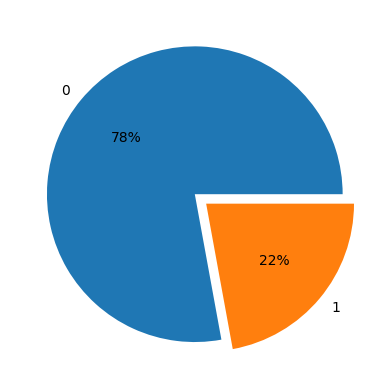

'Perc. of class 1: 22.12'

In [18]:
plt.figure()
values = data['target'].value_counts()
keys = [0, 1]
explode = [0, 0.1]
plt.pie(values, labels=keys, explode=explode, autopct='%.0f%%')
plt.show()

display("Perc. of class 1: " + str(data['target'].sum() / data.shape[0] * 100))

As you see our data set is not balanced, for a good classification the data set should be well distributed, i.e., the number of samples for which class should be equal.

In order to do a good classification this should be taken in count. The balancing it will no be done now, but in the moment of selecting the data set for training.

## Features Evaluation
### Feature Correlation

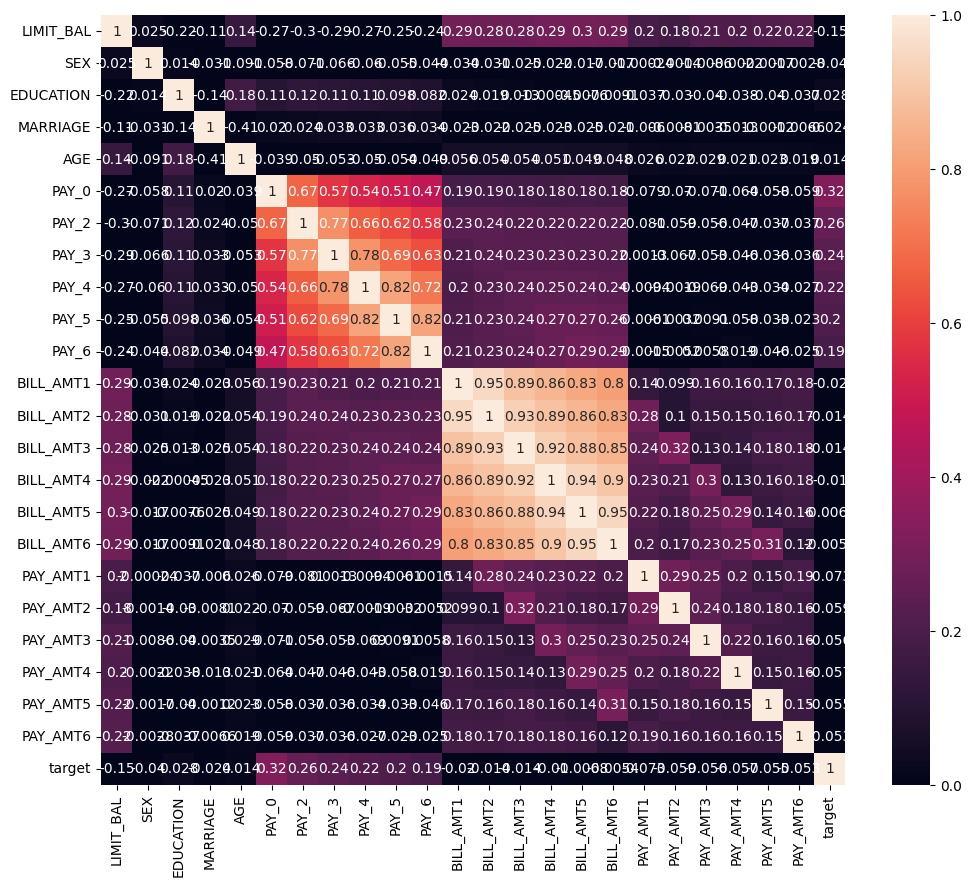

In [9]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(corr, annot=True, vmin=0.0)
# , cmap='mako'
plt.show()

## Data Processing
### Data Scalling

In [5]:
y = data['target'].copy()
X = data.copy()
X.drop(['target'], axis=1, inplace=True)

In [6]:
scaler =  StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
5,-0.905498,-1.234323,-1.079457,0.858557,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381
6,2.562830,-1.234323,-1.079457,0.858557,-0.703588,0.014861,0.111736,0.138865,0.188746,0.234917,...,5.739063,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207
7,-0.520128,0.810161,0.185828,0.858557,-1.354506,0.014861,-0.723570,-0.696663,0.188746,0.234917,...,-0.669262,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642
8,-0.211833,0.810161,1.451114,-1.057295,-0.812074,0.014861,0.111736,1.809921,0.188746,0.234917,...,-0.503332,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130
9,-1.136720,-1.234323,1.451114,0.858557,-0.052670,-1.764843,-1.558876,-1.532192,-1.521944,-0.647565,...,-0.677929,-0.672497,-0.449114,-0.419118,-0.341942,-0.256990,-0.296801,0.522212,-0.240697,-0.293382


In [37]:
display("mean: " + str(X.mean().sum()))
display("std: " +  str(X.std().sum() / X.shape[1]))

'mean: -2.437161583657143e-16'

'std: 1.0000166670833446'

In [107]:
mu = X.mean()
s = X.std()

X = (X - mu) / s

In [134]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X['target'] = y

df_1 = X[y == 1]
df_0 = X[y == 0]
df_0 = df_0.sample(len(df_1))
X = pd.concat([df_0, df_1], ignore_index=True, sort=False)
y = pd.DataFrame(X['target'])
X.drop(["target"], axis=1, inplace=True)

Correlations are useful because they can indicate a predictive relationship that can be exploited in practice.

For this case it is possible to notice that there are no strong correlations between target and another features, which means to get a good model it will be from a combination of features rather a few columns.

Obeserve the stronger correlation with the target is the **PAY_#** features, which make sense because if the client is late on payment, probably will be late to another one.

### Data Train and Data Test Split

In [135]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)
rus = RandomUnderSampler(random_state=SEED)
X_train, y_train = rus.fit_resample(X_train, y_train)

display(len(y_train == 0))
display(len(y_train == 1))

9954

9954

### Violin Plots

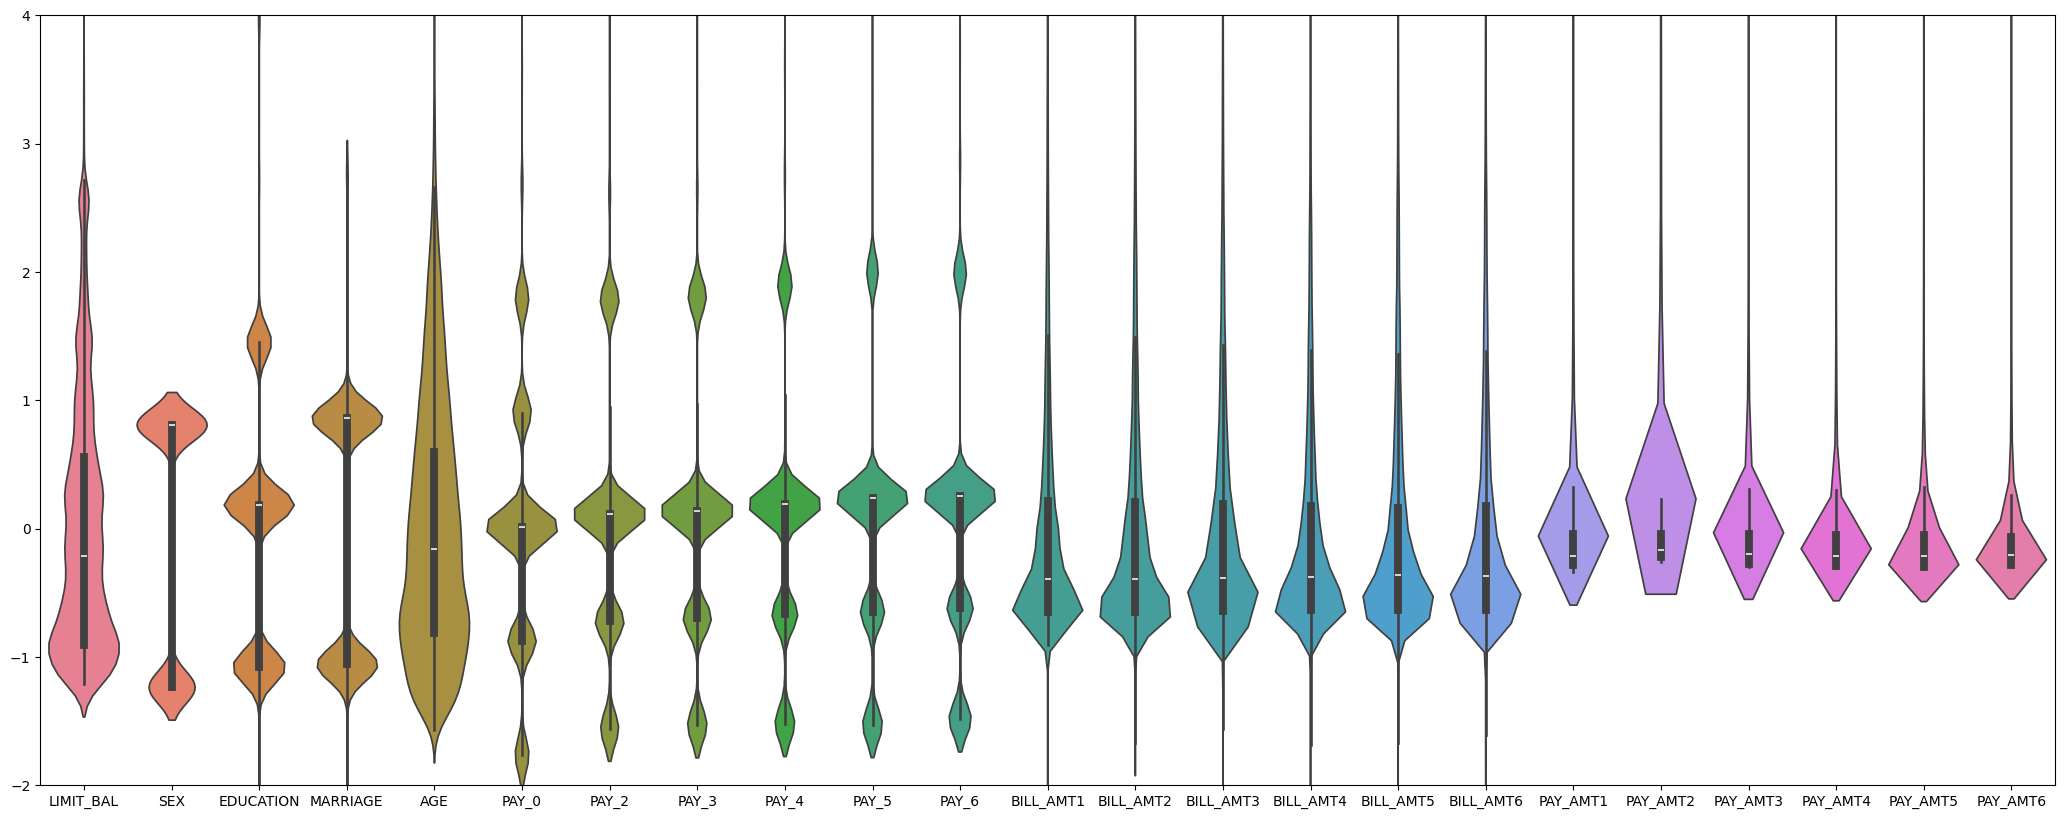

In [8]:
plt.figure(figsize=(26,10))

cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
sb.violinplot(X)

plt.ylim(-2, 4)
plt.show()

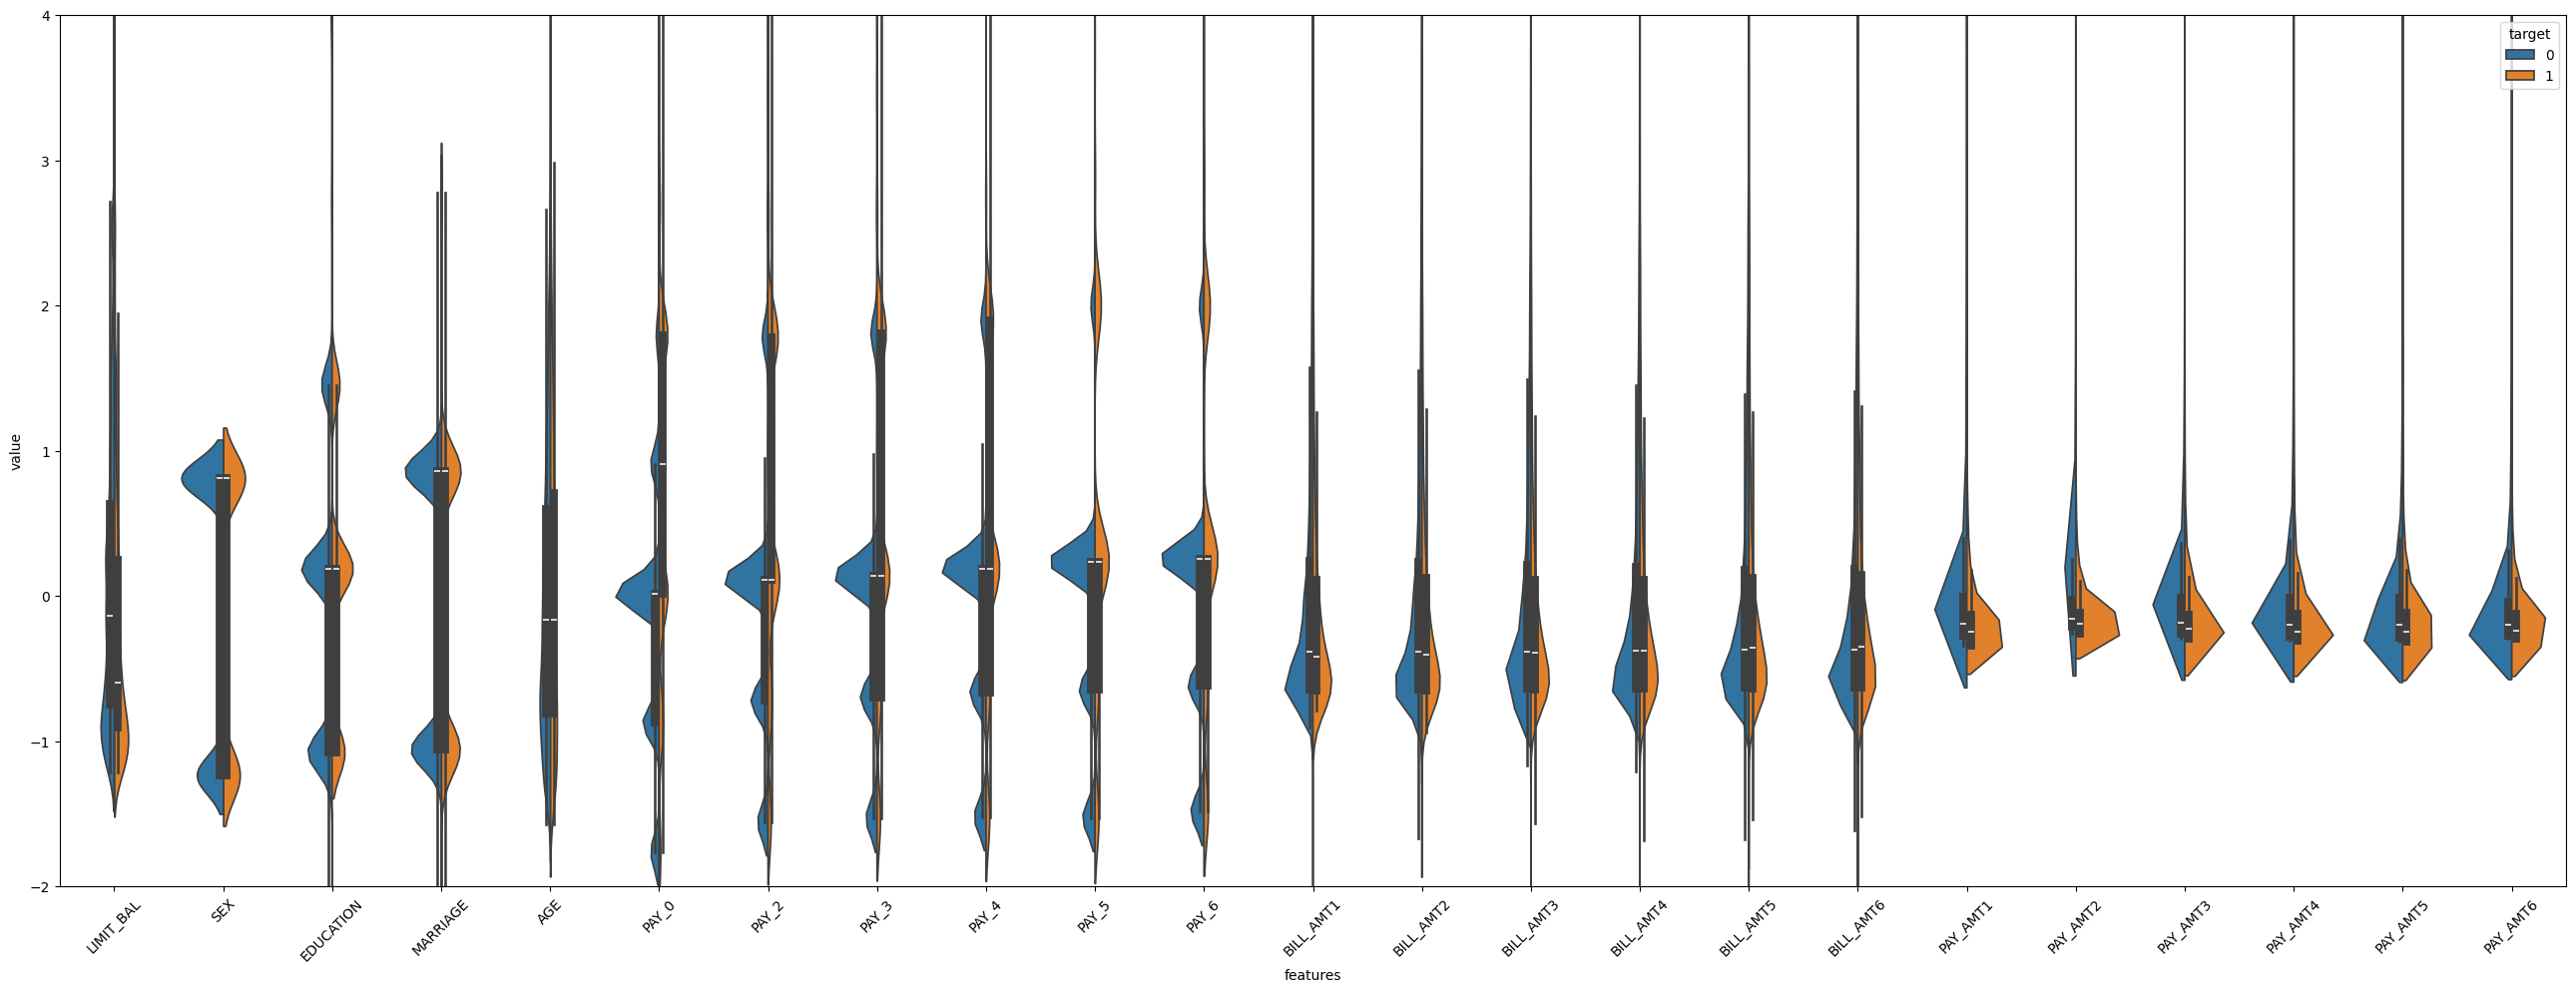

In [75]:
df = X.copy()
df['target'] = y
df_long = pd.melt(df, id_vars='target', var_name='features', value_name='value')

plt.figure(figsize=(26, 10))
sb.violinplot(x='features', y='value', hue='target', data=df_long, split=True)
plt.tight_layout()
plt.ylim(-2, 4)
plt.show()

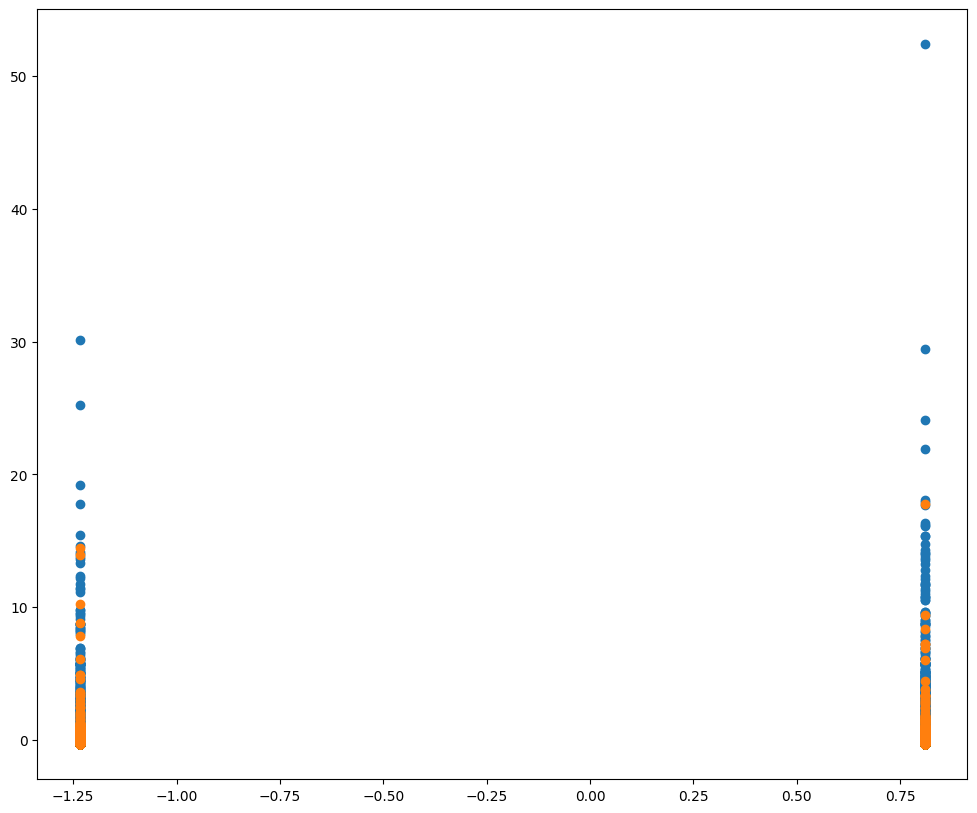

In [86]:

plt.figure(figsize=(12,10))
plt.scatter(X[(y == 0)]["SEX"], X[(y == 0)]["PAY_AMT1"])
plt.scatter(X[(y == 1)]["SEX"], X[(y == 1)]["PAY_AMT1"])

plt.show()

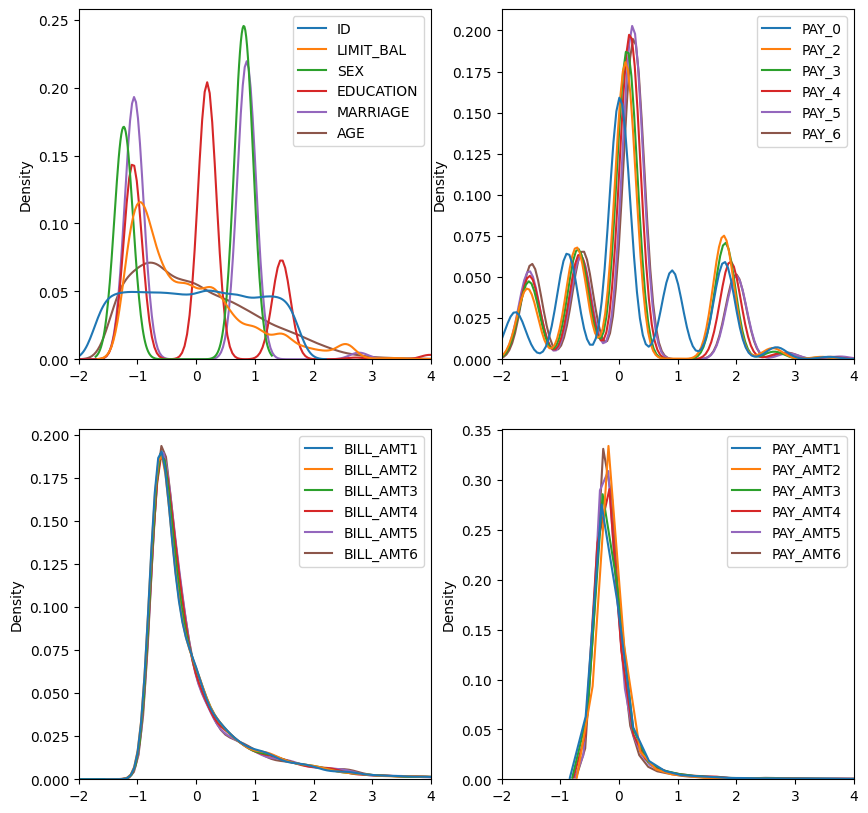

In [122]:
size = int(X.shape[1])
col0 = X.columns[0: size//4]
col1 = X.columns[size//4: size//2]
col2 = X.columns[size//2: size*3//4]
col3 = X.columns[size*3//4:]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sb.kdeplot(ax=axes[0,0], data=X[col0])
sb.kdeplot(ax=axes[0,1], data=X[col1])
sb.kdeplot(ax=axes[1,0], data=X[col2])
sb.kdeplot(ax=axes[1,1], data=X[col3])

axes[0,0].set_xlim(-2,4)
axes[1,0].set_xlim(-2,4)
axes[0,1].set_xlim(-2,4)
axes[1,1].set_xlim(-2,4)

plt.show()

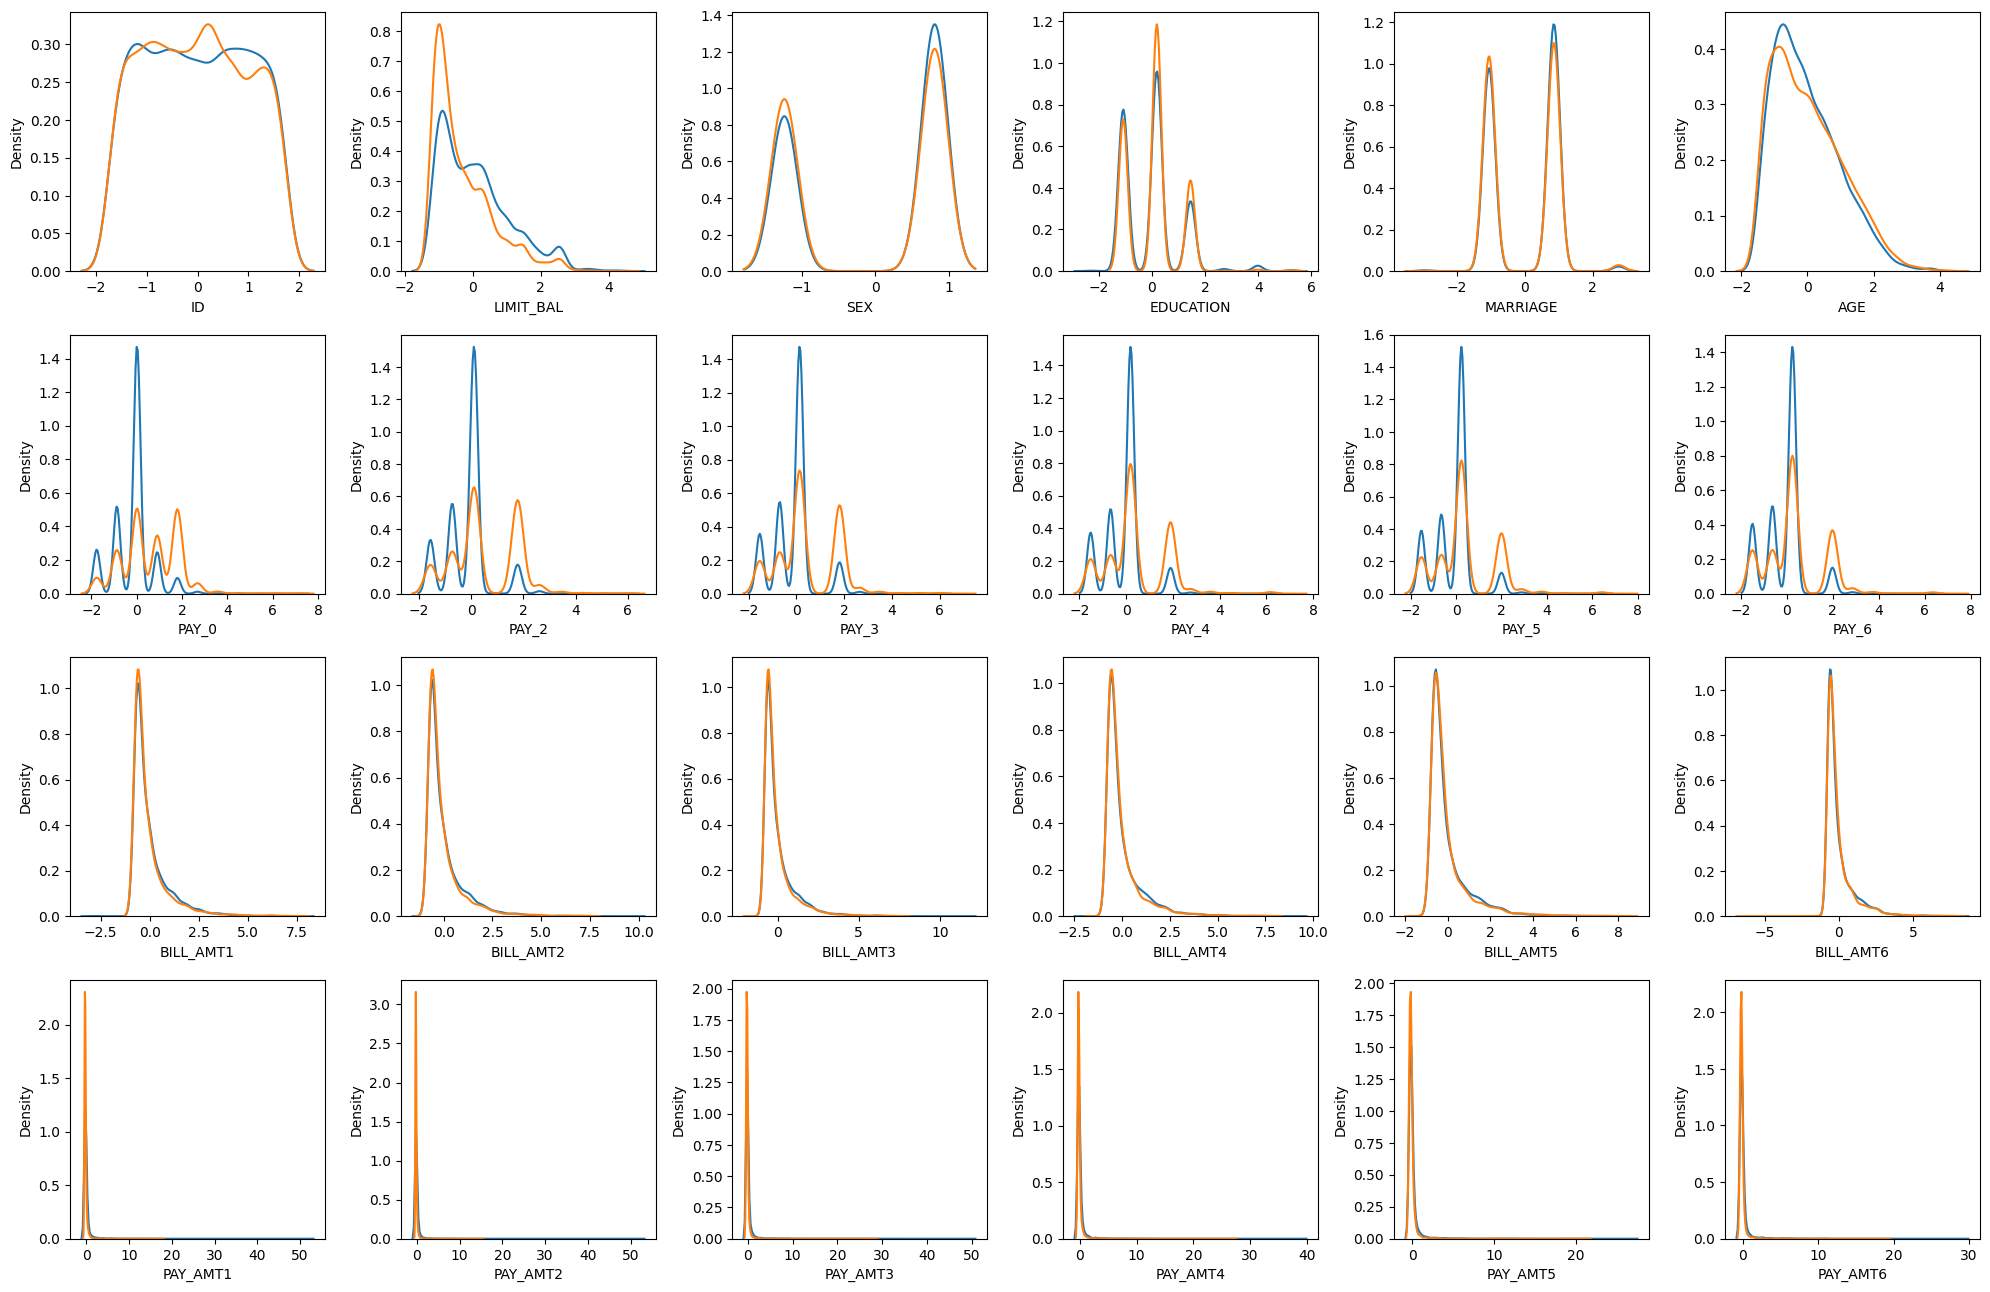

In [123]:
fig, axes = plt.subplots(4, 6, figsize=(20, 13))

for i in range(len(X.columns)):
    sb.kdeplot(ax=axes[i//6, i%6], data=X[y == 0][X.columns[i]])
    sb.kdeplot(ax=axes[i//6, i%6], data=X[y == 1][X.columns[i]])

plt.tight_layout()
plt.show()

### PCA

In [94]:
diff_col = ['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

pca = PCA(n_components=len(diff_col))
pca.fit(X[diff_col])
X_pca = pd.DataFrame(pca.transform(X[diff_col]))
#X_pca = pd.DataFrame(pca.transform(X[diff_col]), columns=['PCA1', 'PCA2'])
display(X_pca)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.752237,-0.224351,0.077842,0.006957,0.041358,-0.000887,0.056266,-0.014605,0.011856,0.008438,0.007986,0.013964
1,-1.663371,-0.143888,0.054601,-0.002852,-0.043890,0.026190,0.099979,-0.084582,-0.006024,0.012391,-0.003943,0.002090
2,-1.134857,-0.176612,-0.015955,-0.129073,-0.098247,0.022383,0.068988,-0.028833,0.110182,-0.074111,-0.041491,-0.055414
3,-0.397181,-0.451105,0.099791,-0.035340,0.055308,-0.050466,0.028205,0.123821,-0.003396,0.150331,0.018002,-0.055896
4,-0.793306,0.864184,0.639980,0.218238,0.465420,-0.305334,1.023194,-0.040981,-0.025187,0.072373,-0.037712,-0.012015
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.542038,-0.704356,0.476931,-0.654073,0.516269,-0.446411,0.160718,2.258837,-0.745586,0.546763,-0.044202,-0.215454
29996,-1.571174,0.081987,0.291635,0.110448,0.074320,0.353838,0.091432,-0.025274,-0.066100,-0.005875,0.027044,-0.006122
29997,-1.135330,0.404524,0.180523,0.479580,-0.192105,0.947349,0.166085,-0.183737,-0.027731,0.049898,0.012460,-0.009275
29998,0.908321,2.788353,-0.584412,-0.862162,2.150790,-0.985331,-4.348572,-0.260917,-0.598225,0.189630,-0.140949,-0.005434


### PCA 2D

In [199]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X))
#display(X_pca)

In [200]:
#display(pd.DataFrame(pca.components_))
#display(pd.DataFrame(pca.explained_variance_ratio_).T)

In [205]:
eigenvalue = pd.DataFrame(pca.explained_variance_ratio_)
all_l = eigenvalue.index
s_l = [i for i in range(2)]
s_l = [0]

display("Total information preserved: " + str(eigenvalue[0][s_l].pow(2).sum() / eigenvalue[0].pow(2).sum() * 100) + " %")

'Total information preserved: 60.22245749969392 %'

In [206]:
X_projected = X.dot(pca.components_[s_l].T)
X_projected

,0
0,-1.887962
1,-0.764696
2,-0.847408
3,-0.196589
4,-0.840934
...,...
29995,2.523445
29996,-1.775043
29997,0.357457
29998,0.650552


In [2]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].scatter(X_projected[y==0][1],0, marker=".", color='blue')
axes[1].scatter(X_projected[y==1][1],0, marker=".", color='orange')
axes[2].scatter(X_projected[y==0][1],0, marker=".", color='blue')
axes[2].scatter(X_projected[y==1][1],0, marker=".", color='orange')

# plt.xlim(-10, 30)
# plt.ylim(-5, 35)
plt.tight_layout()
plt.legend([0, 1])
plt.show()

NameError: name 'plt' is not defined

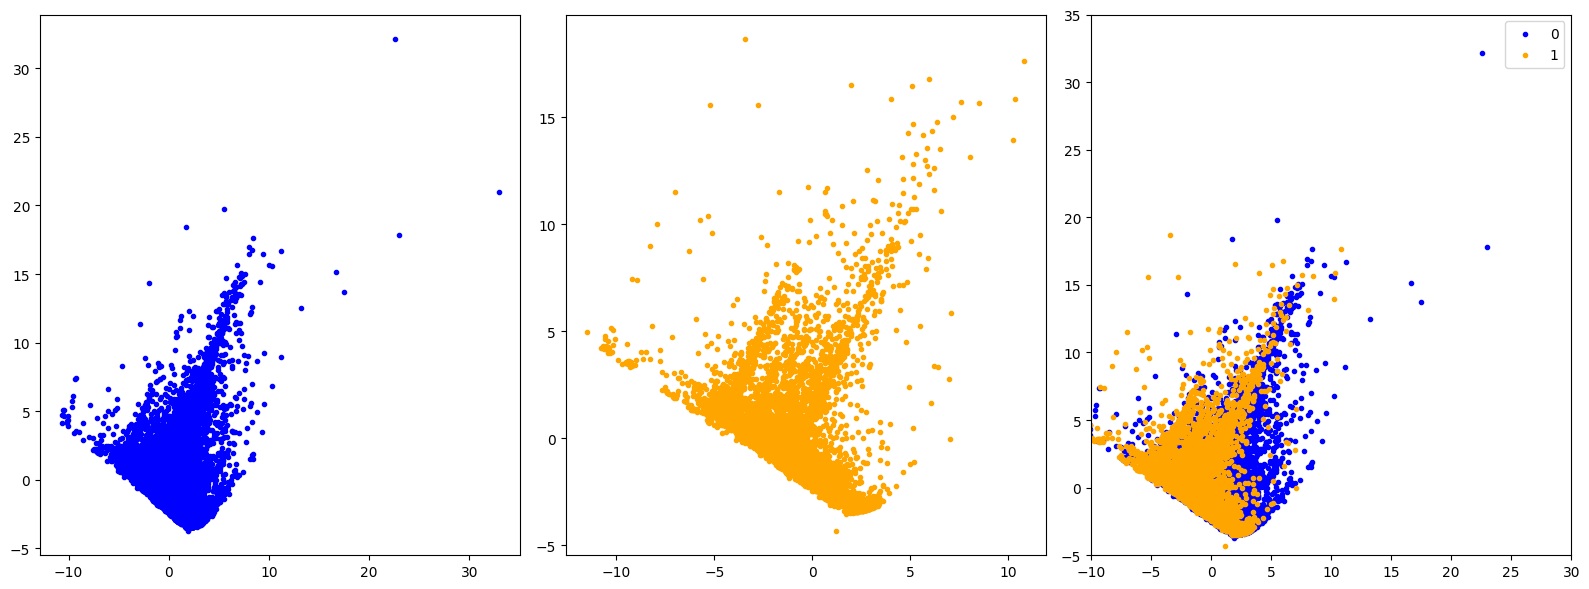

In [191]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].scatter(X_projected[y==0][1], X_projected[y==0][0], marker=".", color='blue')
axes[1].scatter(X_projected[y==1][1], X_projected[y==1][0], marker=".", color='orange')
axes[2].scatter(X_projected[y==0][1], X_projected[y==0][0], marker=".", color='blue')
axes[2].scatter(X_projected[y==1][1], X_projected[y==1][0], marker=".", color='orange')

plt.xlim(-10, 30)
plt.ylim(-5, 35)
plt.tight_layout()
plt.legend([0, 1])
plt.show()

In [1]:
plt.figure(figsize=(10,6))

plt.scatter(X_pca[y==0]['PCA1'], X_pca[y==0]['PCA2'], marker=".")
plt.scatter(X_pca[y==1]['PCA1'], X_pca[y==1]['PCA2'], marker=".")

plt.show()

NameError: name 'plt' is not defined

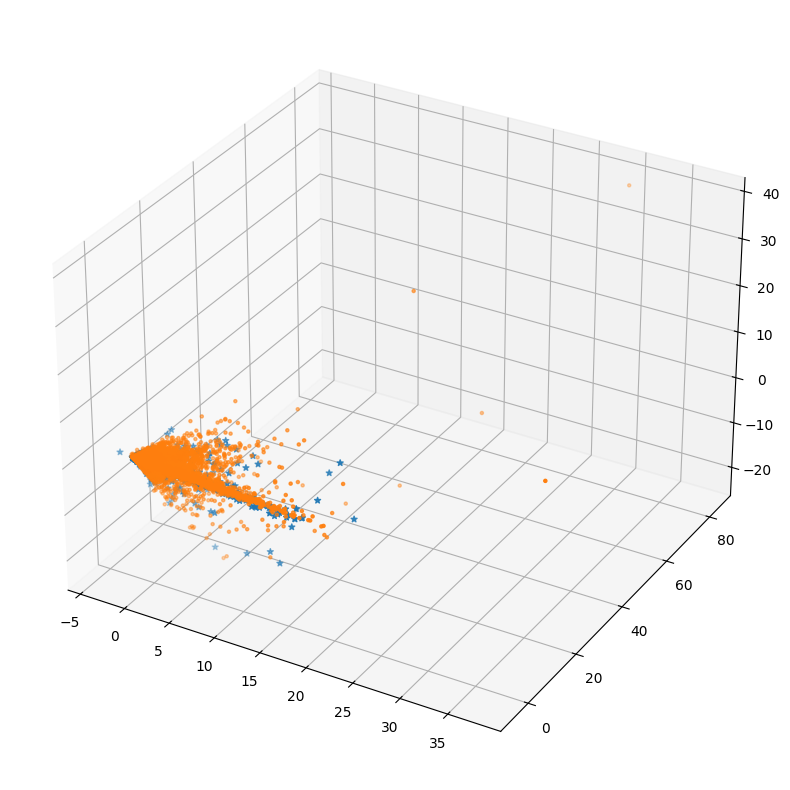

In [59]:

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pca[y==1]['PCA1'], X_pca[y==1]['PCA2'], X_pca[y==1]['PCA3'], marker="*")
ax.scatter(X_pca[y==0]['PCA1'], X_pca[y==0]['PCA2'], X_pca[y==0]['PCA3'], marker=".")

plt.show()

### LDA

In [129]:
lda = LDA(n_components=1)
cols = ['BILL_AMT6', 'PAY_AMT1', 'AGE']
cols = ['LIMIT_BAL', 'AGE']
cols = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX']
X_lda = lda.fit_transform(X[cols], y)
X_lda = pd.DataFrame(X_lda, columns=['LDA'])
display(X_lda)

,LDA
0,-0.152818
1,-0.679226
2,0.805117
3,0.687312
4,0.578998
...,...
9949,-0.249776
9950,-0.277066
9951,0.014450
9952,0.113822


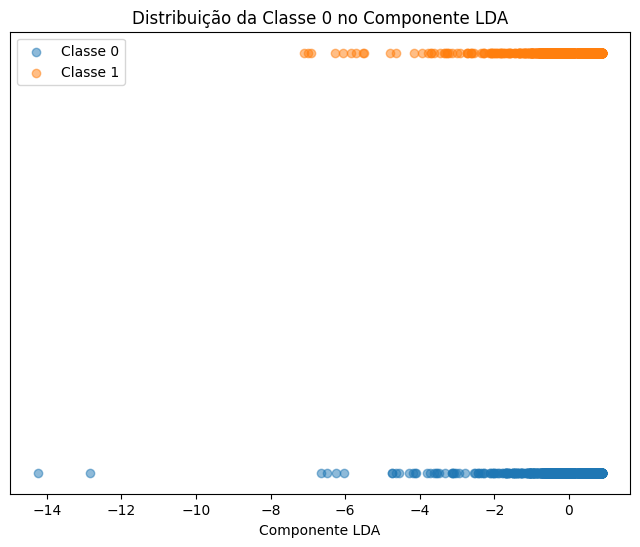

In [131]:

X_lda['class'] = y
class_0_data = X_lda[X_lda['class'] == 0]
class_1_data = X_lda[X_lda['class'] == 1]

# Plotando
plt.figure(figsize=(8, 6))
plt.scatter(class_0_data['LDA'], [0] * len(class_0_data), alpha=0.5, label='Classe 0')
plt.scatter(class_1_data['LDA'], [1] * len(class_1_data), alpha=0.5, label='Classe 1')
plt.title('Distribuição da Classe 0 no Componente LDA')
plt.xlabel('Componente LDA')
plt.yticks([])  # Removendo os ticks do eixo y pois não são relevantes neste caso
plt.legend()
plt.show()

# Training
## Objective Classifiers

In [40]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

In [41]:
models = {
    LogisticRegression(): "  Logistic Regression",
    SVC():                "Suport Vector Machine",
    MLPClassifier():      "       Neural Network"
}

for model in models.keys():
    model.fit(X_train, y_train)

/home/joaomoreira/project/RP-Project/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
from sklearn.metrics import f1_score

for model, name in models.items():
    print(name + " {:.4f}%".format(f1_score(model.predict(X_test), y_test) * 100))

  Logistic Regression 35.9389%
Suport Vector Machine 44.9142%
       Neural Network 47.1208%
